In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Trend
## Direct gradient, 5 changepoints

In [3]:
m = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

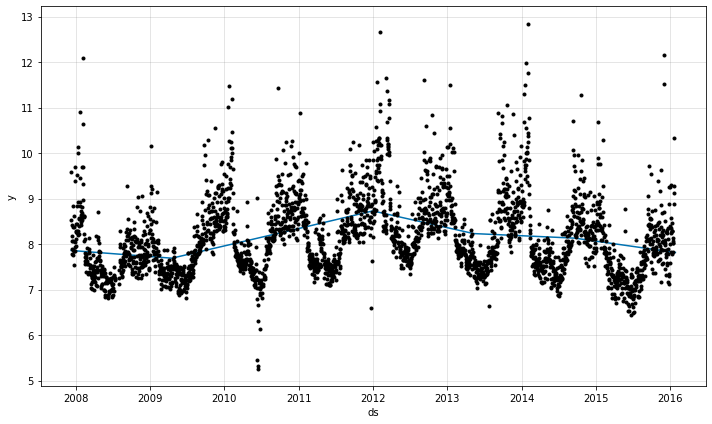

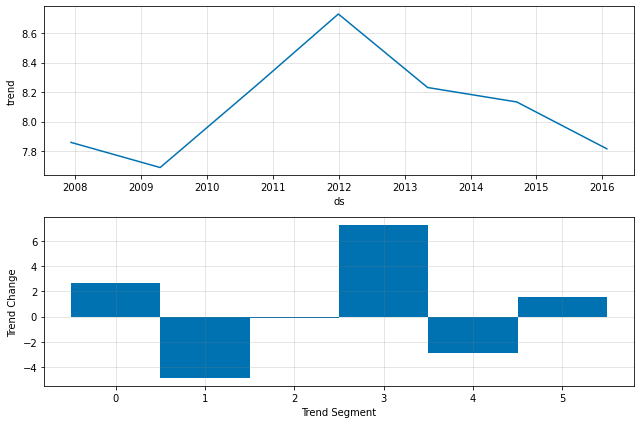

In [4]:
forecast = m.predict(future_periods=6)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Sparse: 2x regularized trend, 100 changepoints

In [5]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


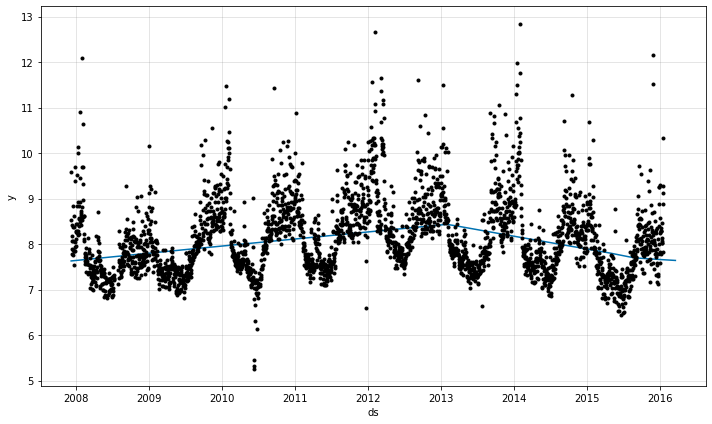

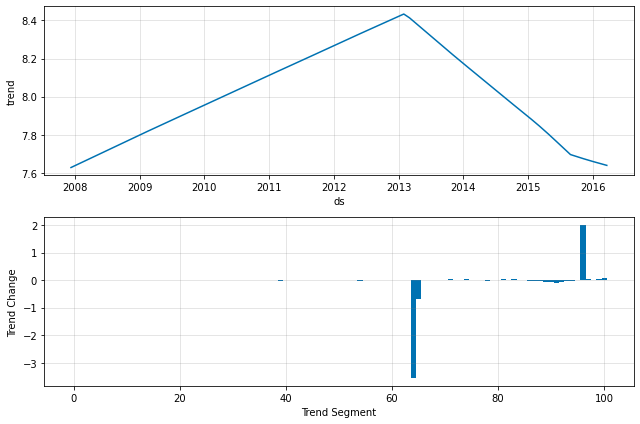

In [6]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Underfit: no changepoints

In [7]:
m = NeuralProphet(
    n_changepoints=0,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

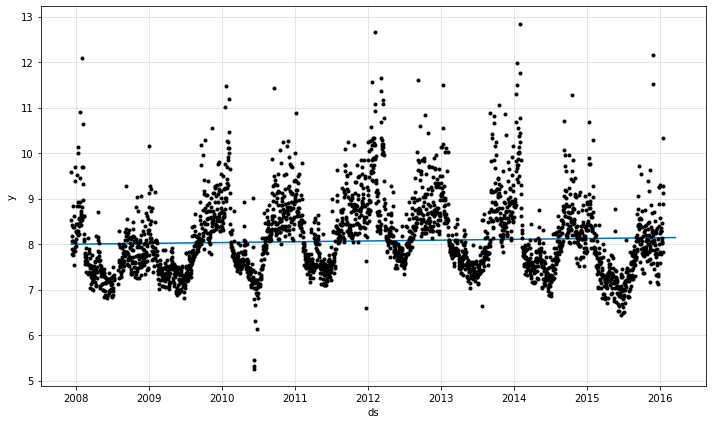

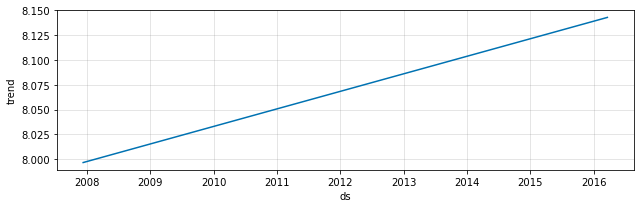

In [8]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Smooth Underfit: 10x regularized trend, 100 changepoints

In [9]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=10,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


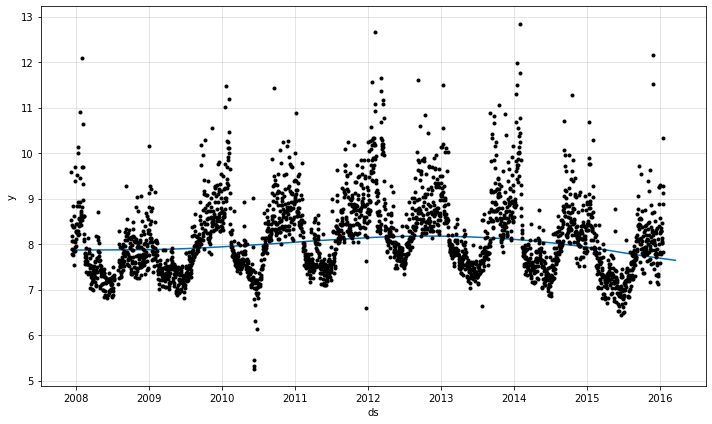

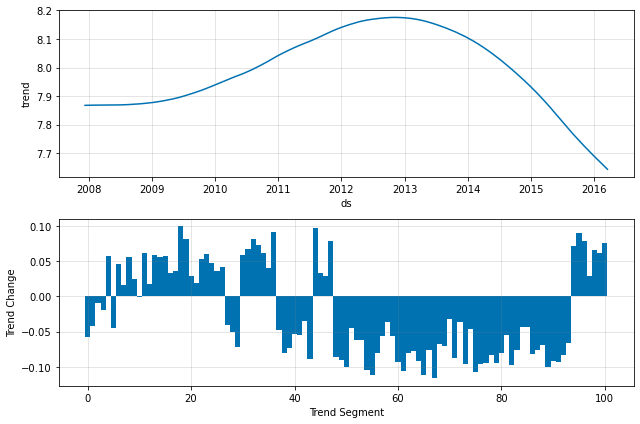

In [10]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Overfit: Direct gradient, 100 changepoints

In [11]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

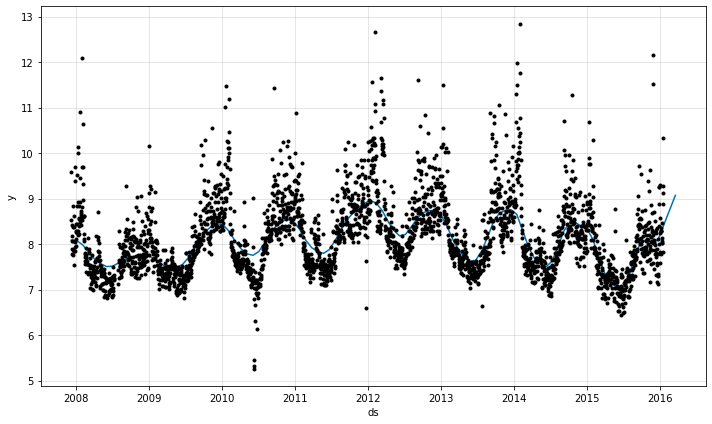

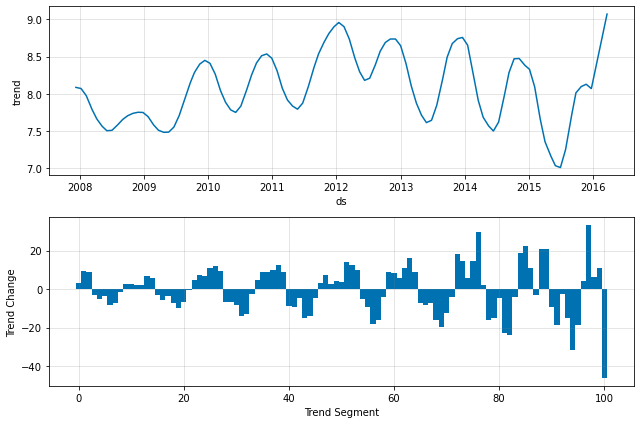

In [12]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Overfit: Direct gradient, discontinuous trend, 100 changepoints

In [13]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=-1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

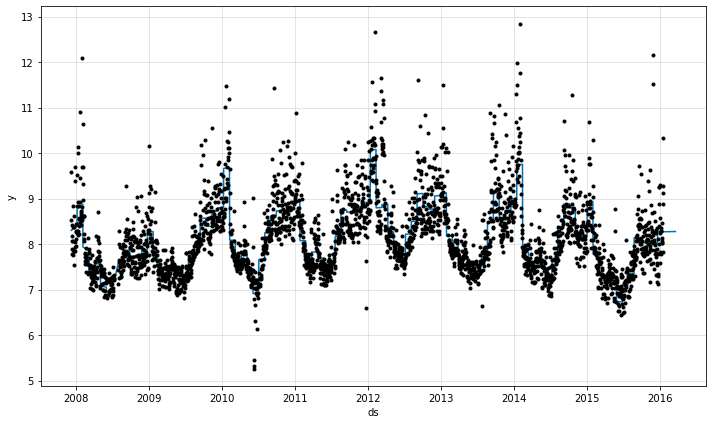

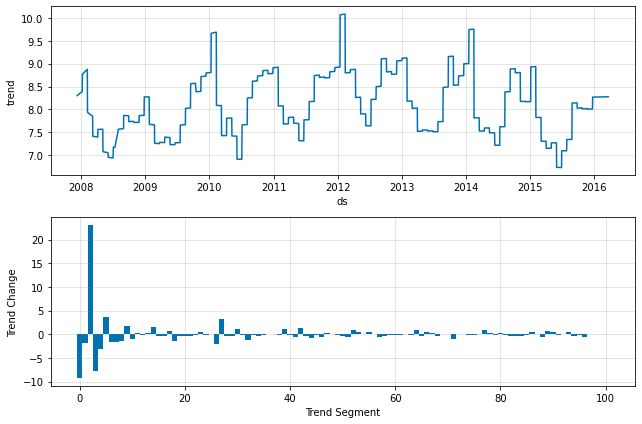

In [14]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Smooth overfit: 0.1xregularized trend, 100 changepoints

In [15]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0.1,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


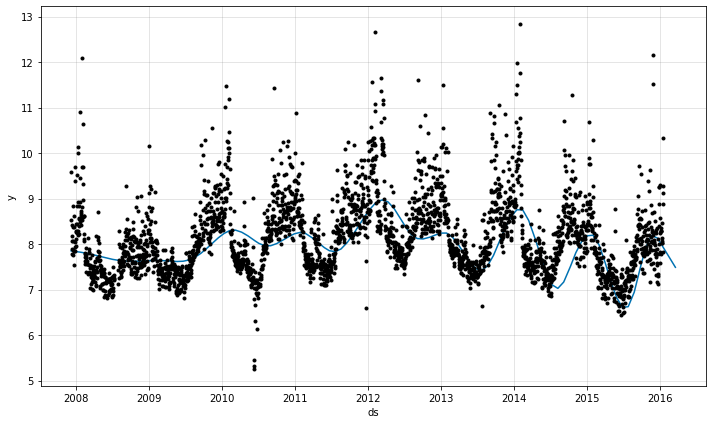

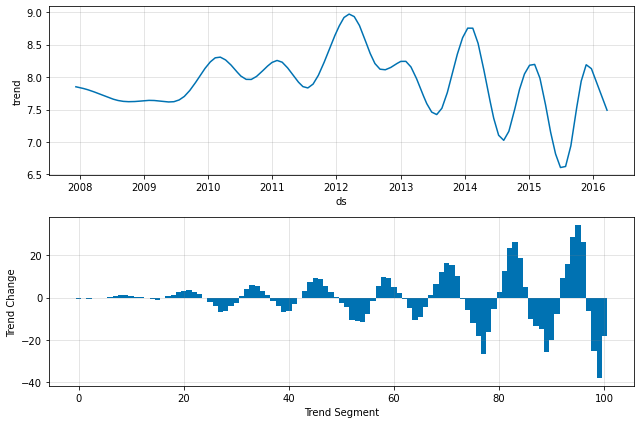

In [16]:
forecast = m.predict(future_periods=60)
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)